In [1]:
#

In [106]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [46]:
from tensorflow.keras import Model

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [48]:
model = Sequential()

In [49]:
# dense는 꼭 알아 둘것

In [50]:
model.add(layers.Dense(100,activation='relu',input_shape=[10]))

In [51]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               1100      
                                                                 
Total params: 1,100
Trainable params: 1,100
Non-trainable params: 0
_________________________________________________________________


In [52]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D

In [54]:
model = Sequential()
model.add(layers.Dense(100,activation='relu',input_shape=[10]))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [55]:
model1 = Sequential(
    [
        Dense(100,activation='relu',input_shape=[10]),
        Dense(50,activation='relu'),
        Dense(10,activation='softmax')
    ]
)

In [56]:
l1 = Dense(100,activation='relu',input_shape=[10])
l2 = Dense(50,activation='relu')
out = Dense(10,activation='relu')
model2 = Sequential([l1,l2,out])

In [57]:
################################################################################

In [58]:
# 함수형 에러난다.

In [59]:
# 연습용 코드

In [60]:
model = Sequential(
    [
        Dense(100,activation='relu',input_shape=(50,)),
        Dense(200,activation='relu'),
        Dense(300,activation='relu'),
        Dense(3,activation='softmax'),
    ]
)

In [61]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 100)               5100      
                                                                 
 dense_41 (Dense)            (None, 200)               20200     
                                                                 
 dense_42 (Dense)            (None, 300)               60300     
                                                                 
 dense_43 (Dense)            (None, 3)                 903       
                                                                 
Total params: 86,503
Trainable params: 86,503
Non-trainable params: 0
_________________________________________________________________


In [62]:
##########

In [63]:
from tensorflow.keras.activations import relu

In [69]:
model = Sequential(
    [
        Dense(100,activation=keras.activations.relu),
        Dense(100,activation=keras.activations.relu,
              kernel_initializer=keras.initializers.GlorotNormal()),
        Dense(100,activation=keras.activations.relu,
               kernel_regularizer=tf.keras.regularizers.l1),
        Dense(100,activation=keras.activations.relu,
         kernel_regularizer=tf.keras.regularizers.l2),
    ]
)
model.build(input_shape=(None,50))

In [67]:
# 

In [95]:
import tensorflow
from tensorflow import keras
from keras.datasets import fashion_mnist

In [96]:
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data()

In [97]:
from keras.utils.np_utils import to_categorical
X_train = X_train.reshape(-1,28*28)
y_train = to_categorical(y_train)

In [98]:
X_train.shape , y_train.shape

((60000, 784), (60000, 10))

In [99]:
model = Sequential(
    [
        Dense(1024,activation='relu',input_shape=(784,)),
        Dense(256,activation='relu'),
        Dense(10,activation='softmax')
    ]
)

In [100]:
optimizer = 'rmsprop'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(
    optimizer=optimizer,
    loss = loss,
    metrics = metrics
)

In [101]:
model.fit(X_train, 
         y_train,
         epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 4.1228 - accuracy: 0.6744
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.9324 - accuracy: 0.7249
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.9476 - accuracy: 0.7348
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.9285 - accuracy: 0.7393
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 1.0007 - accuracy: 0.7274
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 1.0108 - accuracy: 0.7326
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 1.0990 - accuracy: 0.7051
Epoch 8/10
1875/1875 [==============================] - 14s 8ms/step - loss: 1.1355 - accuracy: 0.6910
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 1.1710 - accuracy: 0.6794
Epoch 10/10
1875/1875 [==============================] - 14s 8ms/step - l

In [103]:
model.history.history['loss']

[4.12277364730835,
 0.9323686957359314,
 0.947603702545166,
 0.9284619688987732,
 1.0006542205810547,
 1.0107831954956055,
 1.099008321762085,
 1.1354873180389404,
 1.1710031032562256,
 1.2786661386489868]

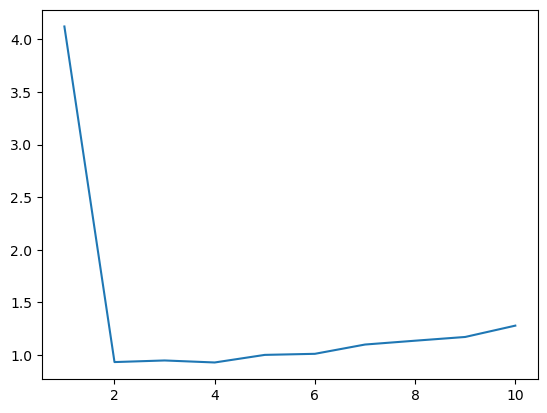

In [107]:
plt.plot(np.arange(1,11),model.history.history['loss'])

In [105]:
model.history.history['accuracy']

[0.6743666529655457,
 0.7249166369438171,
 0.7348333597183228,
 0.7392833232879639,
 0.7273666858673096,
 0.7325666546821594,
 0.7050999999046326,
 0.6909666657447815,
 0.6793666481971741,
 0.6529833078384399]

In [108]:
###################################

In [114]:
class MyModel(keras.models.Model):
    def __init__(self):
        super(MyModel,self).__init__()
        self.h1 = Dense(100,activation='relu')
        self.h2 = Dense(50,activation='relu')
        self.h3 = Dense(60,activation='relu')
        self.out = Dense(10,activation='softmax')
    def call(self,inputs):
        h = self.h1(inputs)
        h = self.h2(h)
        h = self.h3(h)
        self.outputs = self.out(h)
        return self.outputs

In [115]:
model = MyModel()

In [116]:
model.build(input_shape=(None, 784))

In [117]:
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.metrics import Accuracy

In [118]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,
         y_train,
         epochs=2)

Epoch 1/2
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3913 - accuracy: 0.7448
Epoch 2/2
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5534 - accuracy: 0.8070


In [120]:
X_train.shape

(60000, 784)

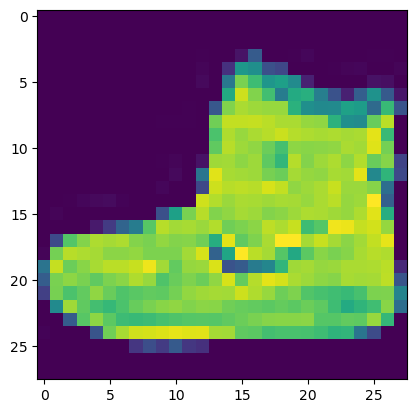

In [122]:
plt.imshow(X_train[0].reshape(28,28))

In [119]:
#################################################################

In [141]:
from keras.datasets import mnist

In [142]:
(X_train, y_train), (_,_) = mnist.load_data()

In [143]:
X_train.shape

(60000, 28, 28)

In [144]:
y_train = to_categorical(y_train)

In [145]:
X_train = X_train[:5000,:,:]

In [146]:
y_train = y_train[:5000,:]

In [147]:
# flatten으로 펴줘야 학습이 된단다
from tensorflow.keras.layers import Flatten

model = Sequential(
    [
        Flatten(input_shape=(28,28)),
        Dense(100,activation='relu'),
        Dense(50,activation='relu'),
        Dense(10,activation='softmax')
    ]
)

In [148]:
model.build(input_shape=(28,28))

In [149]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [150]:
model.fit(X_train,y_train,epochs=2)

Epoch 1/2
157/157 [==============================] - 1s 2ms/step - loss: 8.8338 - accuracy: 0.6774
Epoch 2/2
157/157 [==============================] - 0s 2ms/step - loss: 1.6064 - accuracy: 0.8326


In [151]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_81 (Dense)            (None, 100)               78500     
                                                                 
 dense_82 (Dense)            (None, 50)                5050      
                                                                 
 dense_83 (Dense)            (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [152]:
##############################################################

In [190]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [191]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [192]:
from keras.activations import relu, sigmoid, softmax, tanh
model = Sequential(
    [
        
        Flatten(input_shape=(X_train.shape[1:])),
        Dense(256,activation=sigmoid),
        Dense(128,activation=relu),
        Dense(64,activation=relu),
        Dense(10,activation=softmax)
    ]
)

In [193]:
tmp1 = np.zeros_like(model.layers[1].get_weights()[0])
tmp2 = np.zeros_like(model.layers[1].get_weights()[1])

In [194]:
model.layers[1].set_weights([tmp1,tmp2])

In [196]:
model.layers[1].set_weights

<bound method Layer.set_weights of <keras.layers.core.dense.Dense object at 0x0000021773396280>>

In [197]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [198]:
model.fit(X_train,
         y_train,
         epochs=10,
         batch_size=1000,
         validation_data=(X_test,y_test))

Epoch 1/10
60/60 [==============================] - 1s 13ms/step - loss: 0.7287 - accuracy: 0.7952 - val_loss: 0.2893 - val_accuracy: 0.9169
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 0.2393 - accuracy: 0.9294 - val_loss: 0.2017 - val_accuracy: 0.9418
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 0.1847 - accuracy: 0.9450 - val_loss: 0.1786 - val_accuracy: 0.9446
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 0.1720 - accuracy: 0.9481 - val_loss: 0.1705 - val_accuracy: 0.9491
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 0.1545 - accuracy: 0.9542 - val_loss: 0.1730 - val_accuracy: 0.9498
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.1559 - accuracy: 0.9528 - val_loss: 0.1545 - val_accuracy: 0.9538
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 0.1429 - accuracy: 0.9556 - val_loss: 0.1564 - val_accuracy: 0.9508
Epoch 8/10
60

In [199]:
def check(x):
    plt.imshow(x)
    print(np.argmax(model.predict(x.reshape(1,28,28))))     

In [200]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1520 - accuracy: 0.9523


[0.1520480364561081, 0.9523000121116638]

In [201]:
# ########################################################################

In [202]:
from keras.datasets import cifar10

In [204]:
(X_train, y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 285s 2us/step


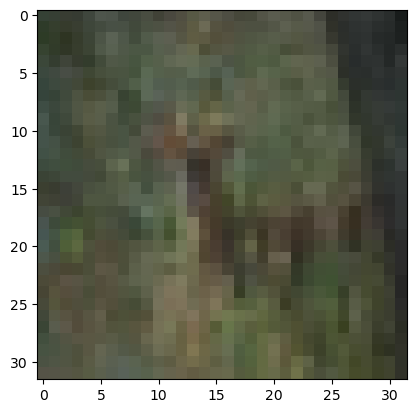

In [205]:
plt.imshow(X_train[10])

In [215]:
#               #               #               #               #               #               #               #               

In [206]:
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)

In [210]:
from keras.layers import BatchNormalization, Dropout

In [211]:
model = Sequential(
    [
        Flatten(input_shape=(X_train.shape[1:])),
        Dense(256,activation='relu'),
        BatchNormalization(),
        Dense(128,activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(y_train.shape[1],activation='softmax')
    ]
)

In [212]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [213]:
model.fit(X_train,
         y_train,
         epochs=10,
         batch_size=256,
         validation_data=(X_test,y_test))

Epoch 1/10
196/196 [==============================] - 4s 14ms/step - loss: 2.1265 - accuracy: 0.3097 - val_loss: 1.8140 - val_accuracy: 0.3422
Epoch 2/10
196/196 [==============================] - 3s 13ms/step - loss: 1.7447 - accuracy: 0.3859 - val_loss: 1.6765 - val_accuracy: 0.4008
Epoch 3/10
196/196 [==============================] - 3s 13ms/step - loss: 1.6349 - accuracy: 0.4222 - val_loss: 1.6337 - val_accuracy: 0.4191
Epoch 4/10
196/196 [==============================] - 3s 13ms/step - loss: 1.5800 - accuracy: 0.4419 - val_loss: 1.6014 - val_accuracy: 0.4343
Epoch 5/10
196/196 [==============================] - 3s 13ms/step - loss: 1.5476 - accuracy: 0.4550 - val_loss: 1.5631 - val_accuracy: 0.4430
Epoch 6/10
196/196 [==============================] - 3s 13ms/step - loss: 1.5203 - accuracy: 0.4635 - val_loss: 1.6063 - val_accuracy: 0.4424
Epoch 7/10
196/196 [==============================] - 3s 13ms/step - loss: 1.5034 - accuracy: 0.4653 - val_loss: 1.5997 - val_accuracy: 0.4316

In [217]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5532 - accuracy: 0.4569


[1.5531686544418335, 0.4569000005722046]

In [218]:
model = Sequential(
    [
        Flatten(input_shape=X_train.shape[1:]),
        Dense(100,activation='relu'),
        Dense(25,activation='relu')
    ]
)

In [219]:
model.predict(X_train)

1563/1563 [==============================] - 2s 1ms/step


array([[ 32.385532,   0.      ,  39.578114, ...,   0.      ,   0.      ,
        222.54784 ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
        154.24203 ],
       [189.1524  ,   0.      ,   0.      , ...,   0.      ,   0.      ,
        282.11215 ],
       ...,
       [ 68.79933 ,   0.      ,   0.      , ...,   0.      ,   0.      ,
        207.37148 ],
       [ 49.765667,   0.      ,   0.      , ...,   0.      ,   0.      ,
        382.64447 ],
       [ 57.989716,   0.      ,   0.      , ...,   0.      ,   0.      ,
        256.2591  ]], dtype=float32)

In [220]:
X_train.shape

(50000, 32, 32, 3)

In [221]:
#####################################################################################################################################

In [222]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [223]:
from keras.datasets import cifar10

In [227]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [228]:
model = Sequential(
    [
        Conv2D(30,(5,5),activation='relu',input_shape=(X_train.shape[1:])),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Conv2D(60,(5,5),activation='relu'),
        MaxPooling2D((3,3)),
        BatchNormalization(),
        Flatten(),
        Dense(256,activation='relu'),
        BatchNormalization(),
        Dense(64,activation='relu'),
        BatchNormalization(),
        Dense(y_train.shape[1],activation='softmax')
    ]
)

In [230]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [233]:
model.fit(X_train,
         y_train,
         epochs=10,
         batch_size=1000,
         validation_data=(X_test,y_test))

Epoch 1/10
50/50 [==============================] - 20s 391ms/step - loss: 0.8364 - accuracy: 0.7118 - val_loss: 0.9299 - val_accuracy: 0.6722
Epoch 2/10
50/50 [==============================] - 19s 385ms/step - loss: 0.7711 - accuracy: 0.7351 - val_loss: 0.9327 - val_accuracy: 0.6735
Epoch 3/10
50/50 [==============================] - 20s 394ms/step - loss: 0.7391 - accuracy: 0.7445 - val_loss: 0.9518 - val_accuracy: 0.6657
Epoch 4/10
50/50 [==============================] - 21s 413ms/step - loss: 0.7136 - accuracy: 0.7532 - val_loss: 0.8742 - val_accuracy: 0.6937
Epoch 5/10
50/50 [==============================] - 21s 423ms/step - loss: 0.6909 - accuracy: 0.7601 - val_loss: 0.8650 - val_accuracy: 0.6942
Epoch 6/10
50/50 [==============================] - 20s 405ms/step - loss: 0.6692 - accuracy: 0.7698 - val_loss: 0.8636 - val_accuracy: 0.6996
Epoch 7/10
50/50 [==============================] - 20s 401ms/step - loss: 0.6472 - accuracy: 0.7776 - val_loss: 0.8583 - val_accuracy: 0.6997

In [236]:
# 사진들

In [237]:
category = {
0:"airplane",
1:"automobile",
2:"bird",
3:"cat",
4:"deer",
5:"dog",
6:"frog",
7:"horse",
8:"ship",
9:"truck",
}

In [238]:
category[np.argmax(model.predict(X_train[[10]]))]

1/1 [==============================] - 0s 132ms/step


'deer'